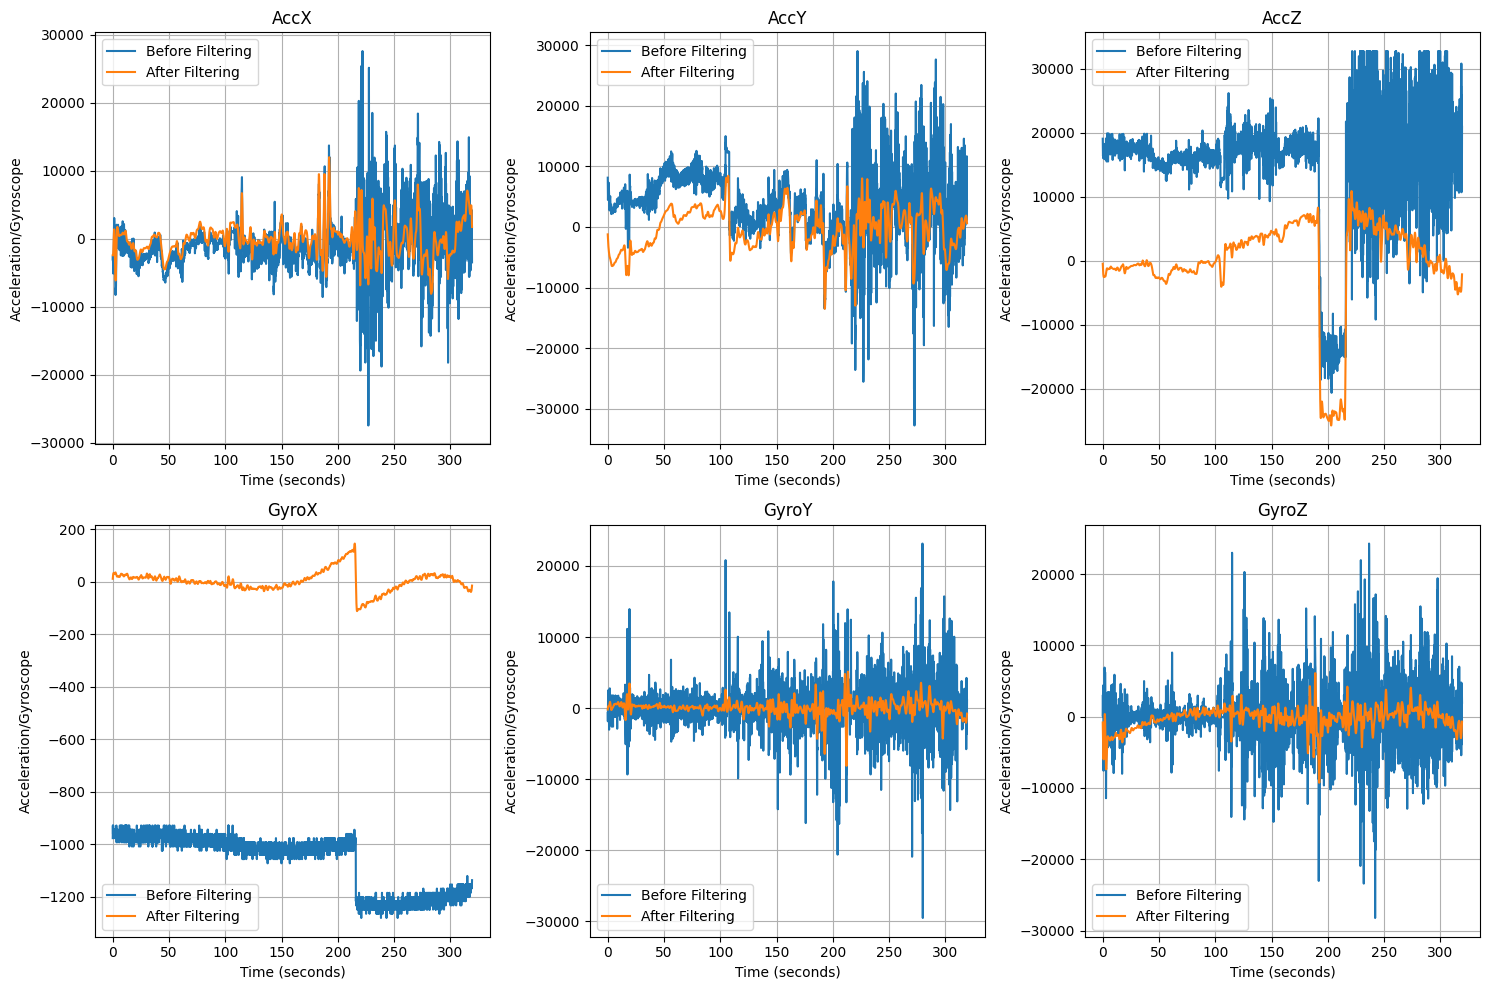

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/combined_data_1.xlsx')

# Extract time array based on sampling frequency
fs = 10 # Assuming 'fs' is the sampling frequency
time = np.arange(len(df)) / fs

# Extract sensor data and labels
sensor_data = df[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].values  # Exclude the last column (status)
labels = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']

# Define cutoff frequencies for the Butterworth filter
lowcut = 0.005  # Low cutoff frequency (Hz)
highcut = 0.5  # High cutoff frequency (Hz)

# Function to apply Butterworth band-pass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Apply Butterworth band-pass filter to each sensor axis
filtered_data = np.zeros_like(sensor_data)
for i in range(sensor_data.shape[1]):
    filtered_data[:, i] = butter_bandpass_filter(sensor_data[:, i], lowcut, highcut, fs)

# Plot data before and after filtering for each parameter separately
plt.figure(figsize=(15, 10))
for i in range(sensor_data.shape[1]):
    plt.subplot(2, 3, i+1)
    plt.plot(time, sensor_data[:, i], label='Before Filtering')
    plt.plot(time, filtered_data[:, i], label='After Filtering')
    plt.title(labels[i])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration/Gyroscope')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
